The first example uses scipy, the later example is taken from a medium article and compares scipy with sklearn

In [33]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [5]:
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

In [6]:
res = stats.linregress(x, y)

In [8]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.735498


In [19]:
print(f"pvalue: {res.pvalue:.6f}")

pvalue: 0.001509


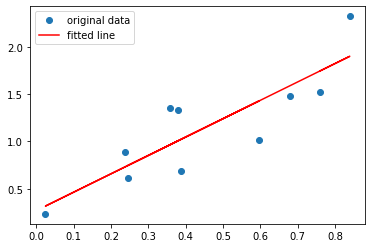

In [9]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Calculate confidence intervals of slope and intercept:

In [18]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)

print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(res.intercept)
# print(res.intercept_stderr)
# print(f"intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}")

slope (95%): 1.944864 +/- 0.950885
0.26857823524544855


Second example
Code taken from this medium article: https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-with-scipy-statsmodels-sklearn-da8e373cc89b

In [34]:
import seaborn as sns
import pandas as pd


In [35]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/celeste/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


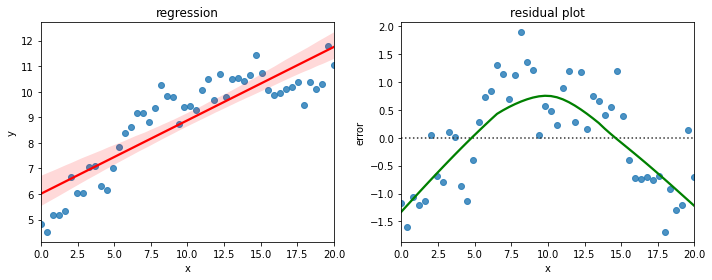

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.regplot(x,y, line_kws={'color':'red'})
plt.xlabel('x')
plt.ylabel('y')
plt.title('regression')
plt.subplot(1,2,2)
sns.residplot(x,y, lowess=True, line_kws={'color': 'green'})
plt.xlabel('x')
plt.ylabel('error')
plt.title('residual plot')
plt.tight_layout()

Regression from scratch:

In [37]:
df = pd.DataFrame()
df['x']=x
df['y']=y
df['xy'] = df.x * df.y
df['x2'] = df.x**2
df['y2'] = df.y**2
df['x-xavg**2'] = (df.x - df.x.mean())**2
df['y-yavg**2'] = (df.y - df.y.mean())**2

In [38]:
def lin_regr_func(x,y):
    n = len(x)
    # denominator
    d = (n*(x**2).sum()-x.sum()**2)
    # intercept
    a = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/d
    # slope
    b = (n*(x*y).sum()-x.sum()*y.sum())/d
    
    y_pred = x*b+a
    yyi = (y-y_pred)**2
    xxi = (x.mean()-x)**2
    #standard error
    sb = np.sqrt(yyi.sum()/(n-2))/np.sqrt(xxi.sum())
    
    # correlation coefficient
    corr_coeff = (n*(x*y).sum() - x.sum()*y.sum())/(np.sqrt(n*(x**2).sum()-x.sum()**2)*np.sqrt((n*(y**2).sum()-y.sum()**2)))
    return a,b,corr_coeff,sb

In [39]:
a, b, corr, sb = lin_regr_func(x,y)
df['y_pred'] = df['x'] * b + a
df['err'] = df['y'] - df['y_pred']
df.head(10)

,x,y,xy,x2,y2,x-xavg**2,y-yavg**2,y_pred,err
0,0.000000,4.833730,0.000000,0.000000,23.364942,100.000000,16.384451,6.008374,-1.174645
1,0.408163,4.518828,1.844420,0.166597,20.419805,92.003332,19.032914,6.125645,-1.606817
2,0.816327,5.178550,4.227388,0.666389,26.817380,84.339858,13.711844,6.242915,-1.064365
3,1.224490,5.161964,6.320772,1.499375,26.645874,77.009579,13.834952,6.360186,-1.198222
4,1.632653,5.339413,8.717410,2.665556,28.509335,70.012495,12.546383,6.477456,-1.138043
5,2.040816,6.645540,13.562327,4.164931,44.163206,63.348605,4.999519,6.594727,0.050814
6,2.448980,6.021639,14.746870,5.997501,36.260132,57.017909,8.178811,6.711997,-0.690359
7,2.857143,6.043632,17.267519,8.163265,36.525484,51.020408,8.053501,6.829268,-0.785636
8,3.265306,7.048887,23.016773,10.662224,49.686805,45.356102,3.358474,6.946538,0.102349
9,3.673469,7.077051,25.997330,13.494377,50.084650,40.024990,3.256039,7.063809,0.013242


Or use scipy again

In [40]:
slope, intercept, r_sq, p_value, std_err = stats.linregress(x, y)

In [41]:
r_sq**2

0.7748543580510973

Now use STATSMODELS

In [42]:
import statsmodels.api as sm

In [43]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.72e-17
Time:                        13:34:30   Log-Likelihood:                -66.354
No. Observations:                  50   AIC:                             136.7
Df Residuals:                      48   BIC:                             140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0084      0.259     23.159      0.0

In [44]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

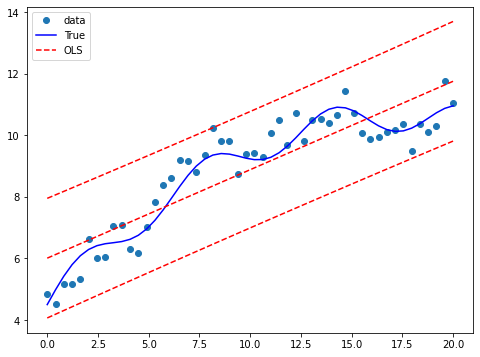

In [46]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize = (8,6))

ax.plot(x, y, 'o', label = 'data')
ax.plot(x, y_true, 'b-', label = "True")
ax.plot(x, res.fittedvalues, 'r--', label = "OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')


In [47]:
from statsmodels.tools.eval_measures import mse, rmse

Mean square error and root mean square error

In [49]:
mse_c = (df['err']**2).sum()/len(df['err'])
mse_c, np.sqrt(mse_c)

(0.8321578951190771, 0.9122268879610363)

In [50]:
mse(df['y'], df['y_pred']), rmse(df['y'], df['y_pred'])

(0.8321578951190771, 0.9122268879610363)

Now use SKLEARN

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
reg = LinearRegression().fit(df[['x']], df['y'])
reg.score(df[['x']], df['y'])

0.7748543580510974

In [54]:
reg.coef_, reg.intercept_

(array([0.28731263]), 6.008374451463975)

In [55]:
mean_squared_error(df[['y']], df['y_pred'])

0.8321578951190771